## BEEM011 Exercise 4: Week 5

Amy Binner and Eva Poen

Answers

## Useful R code

INSTALLING A PACKAGE AND ADDING TO LIBRARY

install.packages(“AER”)

library(AER)

data(“CASchools”)

SCATTERPLOT

plot(y~x, main = "example scatterplot", xlab="x", ylab="y")

LINEAR REGRESSION

reg <- lm(y~x,data =mydata)

PLOTTING RESIDUALS

plot(reg$residuals)

CREATING DUMMY VARIABLES

ifelse(x>10, 1, 0)


# Question 1 a)

Load the AER package into library (by this time, you should have installed the AER package already. If not, run install.packages(“AER”)). If this fails check that you have the R kernel running.  You can change from a Python to an R Kernel by selecting Kernel > Change Kernel >R.  You can also install packages via the powershell prompt.  Open Powershell (terminal on a Mac) and type the following:

*conda install -c conda-forge r-AER*

Load the dataset using the function data(“CASchools”), this is the dataset used in the lecture. 

For details, type ?CASchools in your R code cell. 

Generate the variable student-teacher ratio by dividing students by teachers in the dataset and call this variable str.  

In [2]:
## Edit the code below 
# Header: Exercise 4 
# Author: 
# Date:
# Candidate number:

# install.packages("AER")
library(AER)
data("CASchools")

# Generate a variable for the student-teacher ratio

CASchools$str <- CASchools$students / CASchools$teachers;

# Calculate the mean str 
meanstr <- mean(CASchools$str);
print(meanstr)

Loading required package: car
Loading required package: carData
Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: survival


[1] 19.64043


## 1 b)	

Generate a binary vector (or indicator variable) that is equal to 1 if str>20 and 0 otherwise. Call this variable dum1 and append this vector to the dataset CASchools. 

You can use the function ifelse(). For example, creating a dummy variable called dummy that is equal to 1 when X>0 and 0 otherwise would use the command: 

dummy <- ifelse(X>0, 1, 0).  

In [3]:
# Creating dum1

CASchools$dum1 <- ifelse(CASchools$str>20,1,0);


# 1 c)

Compute group-specific sample means of the observations in reading score (variable name read). 
Assign the mean of observation in reading score where dum1=1 to mu_Y_D1 and assign the mean of those observations with dum1 = 0 to mu_Y_D0. 

Calculate the difference between the two means and print it to the screen.

In [4]:
# Computing Group Specific Means

mu_Y_D1 <- mean(CASchools$read[CASchools$dum1==1])

mu_Y_D0 <- mean(CASchools$read[CASchools$dum1==0])

diff <- mu_Y_D0 - mu_Y_D1

# Compute the difference between means

print(diff)


[1] 8.734489


## 1 d)

Use lm() to regress reading scores, read, on dum1. That is, estimate the coefficients in the model 
$read_i= β_0+ β_1 D_i+u_i$. 

Compare your estimates of the coefficients $β_0$ and $β_1$ to the calculated sample means mu_Y_D1 and mu_Y_D0. 

What do you notice? What can you conclude from your observation?

#### Write your answer here

In [5]:
reg1 <- lm(read~dum1, data=CASchools)
summary(reg1)


Call:
lm(formula = read ~ dum1, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.151 -15.176   0.399  13.682  47.983 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  658.651      1.261 522.184   <2e-16 ***
dum1          -8.734      1.943  -4.495    9e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.66 on 418 degrees of freedom
Multiple R-squared:  0.04612,	Adjusted R-squared:  0.04383 
F-statistic: 20.21 on 1 and 418 DF,  p-value: 9.005e-06


$ \widehat{read}_i = 658.651-8.734D_i$. 
Notice that the intercept, which is the expected value (or mean) of read when dummy=0 (or  STR ≤ 20), is equivalent to  mu_Y_D0. Moreover, $\widehat{read}_i = 658.651-8.734= 649.917$ when dummy=1 (or  STR> 20). This is equivalent to mu_Y_D1. 

Hence, $\beta_1$ calculates the difference between the means of the two groups.

# Question 2 a)

For this question, use the CPS1985 data, which is a cross section data from the May 1985 Current Population Survey by the US Census Bureau (random sample drawn for Berndt 1991 study) [Install the package “AER” if you have not done so and load it in your library. Then load the dataset “"CPS1985"”]. The data has the variables wage (Wage in dollars per hour) and education (Number of years of education). 

Plot wage on the Y-axis and education on the X-axis. Run a regression of wage on education and plot the fitted values on the same plot. 

What can you say about the variance of the conditional distribution of the residuals given the years of education? What can you conclude about the residuals?

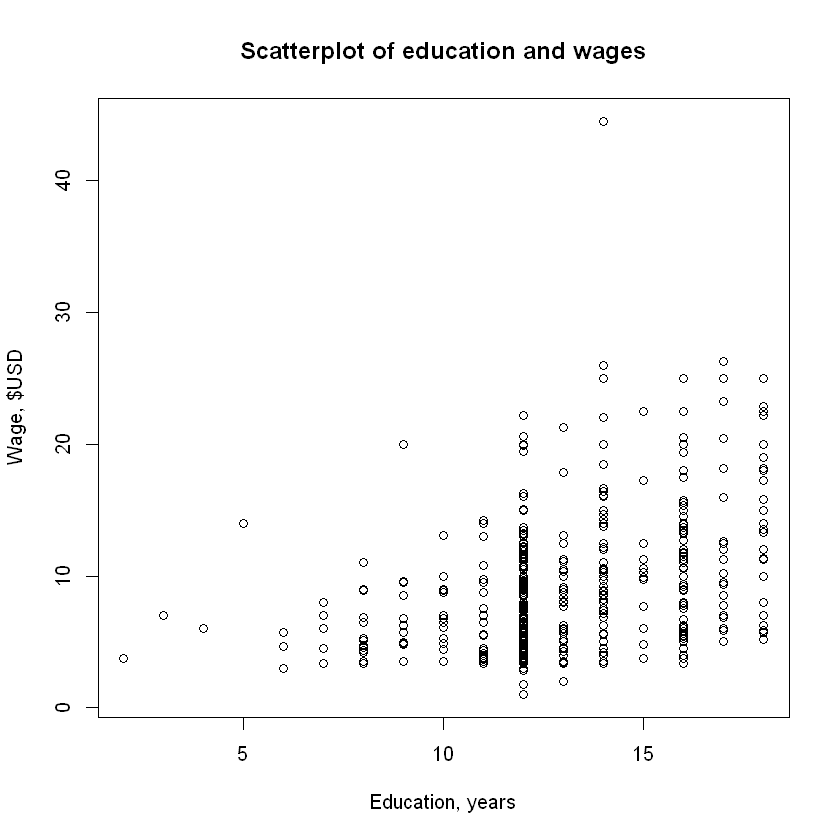

In [7]:
## Load the dataset
data("CPS1985")

# Plot wage on the Y-axis and education on the X-axis. 

plot1 <- plot(CPS1985$wage~CPS1985$education, xlab = "Education, years", 
              ylab = "Wage, $USD", main = "Scatterplot of education and wages") 


## DO NOT EDIT
#print(plot1)

#### Write your answers here

The residuals look heteroskedastic since the variance is not constant across years of education.

## Question 2 b)

Run a regression of wage on education and calculate homoskedastic-only standard errors. 

Using the procedure from the lecture, run a regression of wage on education and calculate heteroskedastic-robust standard errors. 

Compare the two standard errors for the slope coefficient. 

#### Which one is larger? What can you conclude from this exercise? 


In [6]:
## Regression of wage on education with homoskedasticity only standard errors

reg <- lm(wage~education, data=CPS1985) 

# We will now save the summary into an object so that we can access the homoskedasticity only SEs later
reg_summ <- summary(reg)

## estimate using hetero-skedastic robust SEs
hetero_vcov <- vcovHC(reg, type = "HC1")

# compute the square root of the diagonal elements in vcov
robust_se <- c(sqrt(diag(hetero_vcov)))

# calculate homoskedasticity-only SEs
homo_se <- c(reg_summ$coef[1,2], reg_summ$coef[2,2])

# print heteroskedasticity-robust SEs and homoskedasticty-only SEs

se <- data.frame(homo_se, robust_se)

print(se)

               homo_se  robust_se
(Intercept) 1.04545406 1.04039568
education   0.07873373 0.08431256


#### Write your answers here

The heteroscedasticity SEs for beta1 is higher by 0.006. In terms of inference, this does not make any difference. That is, whether we use homoskedasicity-only or heteroscedasticity-robust SEs, education is statistically significant at 1% level, implying that heteroscedasticity is not a significant issue in the data. In general, however, we should use heteroskedasticity-robust standard errors over homoskedasicity-only because the former is still valid even in the absence of heteroskedasticity. It will just approach homoskedasicity-only SEs when there is no heteroskedasticity of errors in the data. 

#### Write your interpretation here

In [ ]:
## DO NOT EDIT
# This section formats your answers for marking
answers = c(CASchools$str, diff, plot1, reg, se)